In [ ]:
#pip install opencv-contrib-python
#pip install matplotlib
#http://localhost:8888/tree?token=50acbf17c9fdba78e16ee89f5bb84854e8c12c09b92dcae0
folder_path = 'C:/Users/Dell/Documents/ImagenesCarros/'

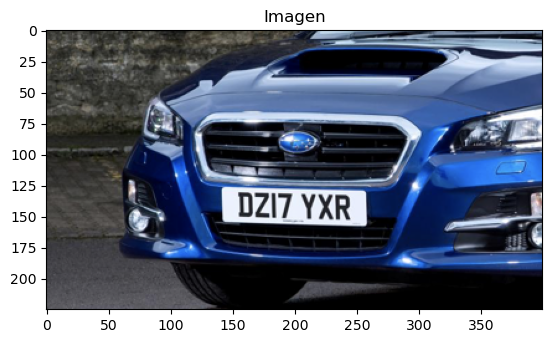

In [2]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

imagen = cv.imread(folder_path + 'Cars3.png')
imagen_color = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)
plt.imshow(imagen_color)
plt.title("Imagen")
plt.show()

In [ ]:
import cv2 as cv

img01 = cv.imread(folder_path + 'Cars96.png')
img02 = cv.imread(folder_path + 'Cars96.png', cv.IMREAD_GRAYSCALE)

alto1, ancho1, canales1 = img01.shape
alto2, ancho2 = img02.shape

print("alto: ", alto1, "ancho: ", ancho1,"canales: ", canales1 )
print("alto: ", alto2, "ancho: ", ancho2)

cv.imshow("img01", img01)
cv.imshow("img02", img02)
cv.waitKey(0)
cv.destroyAllWindows()

alto:  248 ancho:  400 canales:  3
alto:  248 ancho:  400


In [2]:
import cv2 as cv
import numpy as np
img_gris = cv.imread(folder_path + 'cars3.png', cv.IMREAD_GRAYSCALE)
kernel = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

img_ker = cv.filter2D(src=img_gris, ddepth=-1, kernel=kernel)

cv.imshow("Imagen con kernel", img_ker)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
import cv2 as cv
img_gris = cv.imread(folder_path + 'cars296.png', cv.IMREAD_GRAYSCALE)
kernel = cv.GaussianBlur(img_gris, (9, 9), 0)

cv.imshow('Imagen', img_gris)
cv.imshow('Imagen con filtro', kernel)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
import cv2 as cv
img = cv.imread(folder_path + 'coche11.jpeg')

b, g, r = cv.split(img)

b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

img_eq = cv.merge((b_eq, g_eq, r_eq))
cv.imshow('Equalizada', img_eq)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
import cv2 as cv
import numpy as np

#Para leer imagenes a color
img_color = cv.imread(folder_path + 'coche16.jpeg')
img_gris = cv.imread(folder_path + 'coche16.jpeg', cv.IMREAD_GRAYSCALE)

#Filtro gausiano con kernel
blur = cv.GaussianBlur(img_gris, (11,11), 0)
cv.imshow('Gaussiano', blur)

#mejora contraste
clahe = cv.createCLAHE(clipLimit=1.5, tileGridSize=(8, 8))
eq01 = clahe.apply(blur)
cv.imshow('Ajuste de contrase', eq01)

#binarizar la imagen
otsu_threshold, otsu01 = cv.threshold(eq01, 0, 255, cv.THRESH_OTSU)
cv.imshow('Imagen binarizada', otsu01)

#bordes Canny
edges = cv.Canny(otsu01, 150, 350)
cv.imshow('Bordes de Canny', edges)

#guardar bordes
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
long_contours = [cnt for cnt in contours if (cv.arcLength(cnt, True) > 200 and (cv.arcLength(cnt, True) < 700))]

#dibujar placas
alto, ancho, canales = img_color.shape
for lonc in (long_contours):
    r = [x  for[[x, y]] in lonc]
    s = [y for [[x, y]] in lonc]
    prop = (max(s) - min(s)) - (max(r) - min(r))

    if ((max(s) > round(alto/2)) and prop < 0):
        cv.rectangle(img_color, (min(r), min(s)), (max(r), max(s)), (0, 255, 0), 3)

#cerrar ventanas y terminar
cv.imshow('imagen resultante', img_color)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
import cv2 as cv
import numpy as np

#Para leer imagenes a color sin filtro gaussiano
img_color = cv.imread(folder_path + 'coche14.jpeg')
img_gris = cv.imread(folder_path + 'coche14.jpeg', cv.IMREAD_GRAYSCALE)

'''
#Filtro gausiano con kernel
blur = cv.GaussianBlur(img_gris, (11,11), 0)
cv.imshow('Gaussiano', blur)
'''
#mejora contraste
clahe = cv.createCLAHE(clipLimit=1.5, tileGridSize=(8, 8))
eq01 = clahe.apply(img_gris)
cv.imshow('Ajuste de contrase', eq01)

#binarizar la imagen
otsu_threshold, otsu01 = cv.threshold(eq01, 0, 255, cv.THRESH_OTSU)
cv.imshow('Imagen binarizada', otsu01)

#bordes Canny
edges = cv.Canny(otsu01, 150, 350)
cv.imshow('Bordes de Canny', edges)

#guardar bordes
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
long_contours = [cnt for cnt in contours if (cv.arcLength(cnt, True) > 200 and (cv.arcLength(cnt, True) < 700))]

#dibujar placas
alto, ancho, canales = img_color.shape
for lonc in (long_contours):
    r = [x  for[[x, y]] in lonc]
    s = [y for [[x, y]] in lonc]
    prop = (max(s) - min(s)) - (max(r) - min(r))

    if ((max(s) > round(alto/2)) and prop < 0):
        cv.rectangle(img_color, (min(r), min(s)), (max(r), max(s)), (0, 255, 0), 3)

#cerrar ventanas y terminar
cv.imshow('imagen resultante', img_color)
cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
import cv2 as cv
import numpy as np

#Para leer imagenes a color
img_color = cv.imread(folder_path + 'coche14.jpeg')
img_gris = cv.imread(folder_path + 'coche14.jpeg', cv.IMREAD_GRAYSCALE)

#Filtro gausiano con kernel
blur = cv.GaussianBlur(img_gris, (11,11), 0)
cv.imshow('Gaussiano', blur)

#mejora contraste
clahe = cv.createCLAHE(clipLimit=1.5, tileGridSize=(8, 8))
eq01 = clahe.apply(blur)
cv.imshow('Ajuste de contrase', eq01)

#binarizar la imagen
otsu_threshold, otsu01 = cv.threshold(eq01, 0, 255, cv.THRESH_OTSU)
cv.imshow('Imagen binarizada', otsu01)

#bordes Canny
edges = cv.Canny(otsu01, 150, 350)
cv.imshow('Bordes de Canny', edges)

#guardar bordes
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
long_contours = [cnt for cnt in contours if (cv.arcLength(cnt, True) > 200 and (cv.arcLength(cnt, True) < 700))]

#dibujar placas
alto, ancho, canales = img_color.shape
for lonc in (long_contours):
    r = [x  for[[x, y]] in lonc]
    s = [y for [[x, y]] in lonc]
    prop = (max(s) - min(s)) - (max(r) - min(r))

    if ((max(s) > round(alto/2)) and prop < 0):
        cv.rectangle(img_color, (min(r), min(s)), (max(r), max(s)), (0, 255, 0), 3)

#cerrar ventanas y terminar
cv.imshow('imagen resultante', img_color)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
import cv2 as cv
import numpy as np

#Para leer imagenes a color
img_color = cv.imread(folder_path + 'cars34.png')
img_gris = cv.imread(folder_path + 'cars34.png', cv.IMREAD_GRAYSCALE)

#Filtro gausiano con kernel
blur = cv.GaussianBlur(img_gris, (3,3), 0)
cv.imshow('Gaussiano', blur)

#mejora contraste
clahe = cv.createCLAHE(clipLimit=1.5, tileGridSize=(8, 8))
eq01 = clahe.apply(blur)
cv.imshow('Ajuste de contrase', eq01)

#binarizar la imagen
otsu_threshold, otsu01 = cv.threshold(eq01, 0, 255, cv.THRESH_OTSU)
cv.imshow('Imagen binarizada', otsu01)

#bordes Canny
edges = cv.Canny(otsu01, 150, 350)
cv.imshow('Bordes de Canny', edges)

#guardar bordes
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
long_contours = [cnt for cnt in contours if (cv.arcLength(cnt, True) > 200 and (cv.arcLength(cnt, True) <700))]

#dibujar placas
alto, ancho, canales = img_color.shape
for lonc in (long_contours):
    r = [x  for[[x, y]] in lonc]
    s = [y for [[x, y]] in lonc]
    prop = (max(s) - min(s)) - (max(r) - min(r))

    if ((max(s) > round(alto/2)) and prop < 0):
        cv.rectangle(img_color, (min(r), min(s)), (max(r), max(s)), (0, 255, 0), 3)

#cerrar ventanas y terminar
cv.imshow('imagen resultante', img_color)
cv.waitKey(0)
cv.destroyAllWindows()